# library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data

## step1 --> collect

### data1 -- Times -- complete

In [ ]:
bussines = pd.read_excel('/content/business.xlsx')
politics = pd.read_excel('/content/politics.xlsx')
sports = pd.read_excel('/content/sports.xlsx')
tech1 = pd.read_excel('/content/tech1.xlsx')
tech2 = pd.read_excel('/content/tech2.xlsx')
tech3 = pd.read_excel('/content/tech3.xlsx')
tech4 = pd.read_excel('/content/tech4.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: '/content/business.xlsx'

In [ ]:
print(f'bussines : {bussines.shape}')
print(f'politics : {politics.shape}')
print(f'sports : {sports.shape}')
print(f'tech1 : {tech1.shape}')
print(f'tech2 : {tech2.shape}')
print(f'tech3 : {tech3.shape}')
print(f'tech4 : {tech4.shape}')

In [ ]:
df_news = pd.concat([bussines,politics,sports,tech1,tech2,tech3,tech4], axis=0)

In [ ]:
df_news.shape

In [ ]:
df_news.to_excel('data_times_news.xlsx')

### data2 --labelled_newscatcher --

In [ ]:
import os
import zipfile

zip_file_path = '/content/labelled_newscatcher_dataset.csv.zip'
extraction_directory ='/content/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref :
    print(zip_ref)
    zip_ref.extractall(extraction_directory)

In [ ]:
with open('/content/labelled_newscatcher_dataset.csv', 'r') as file:
    for _ in range(5):
        print(file.readline())

In [ ]:
#csv_file_name = '/content/labelled_newscatcher_dataset.csv'
#csv_file_path = os.path.join(extraction_directory, csv_file_name)

data2 = pd.read_csv('/content/labelled_newscatcher_dataset.csv', delimiter=';')

In [ ]:
data2.shape

In [ ]:
data2.iloc[0:3]['link']

In [ ]:
data2.to_excel('labell_newcatcher.xlsx')

### data3 -- okite97 --uncomplete

In [ ]:
!pip install datasets ;
from datasets import load_dataset;

In [ ]:

# using  API
'''
import requests

# The URL from which to fetch the data
url =  "https://datasets-server.huggingface.co/splits?dataset=ag_news"
# Make a GET request to the URL
response = requests.get(url)

if response.status_code == 200:
    data3 = response.json()

else:
    print(f"Failed to fetch data: status code {response.status_code}")
    data3 = []

try:
    df3 = pd.json_normalize(data3)
    print(df3.head())  # To see the first few rows of the DataFrame
except Exception as e:
    print(f"An error occurred: {e}")
df3 = pd.DataFrame(df3)

'''

In [ ]:
data3 = load_dataset('okite97/news-data')

In [ ]:
type(data3)
data3
train = load_dataset('okite97/news-data' , split='train')
test = load_dataset('okite97/news-data' , split='test')

In [ ]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [ ]:
print(len(train.iloc[0]['Title']))
print(len(train.iloc[0]['Excerpt']))

In [ ]:
print(train.shape)
print(test.shape)

In [ ]:
train['Label_split']='Train'

In [ ]:
test['Label_split']='test'

In [ ]:
data3 = pd.concat([train,test], axis=0)
print(data3.shape)
print(data3['Label_split'].value_counts())

In [ ]:
data3.to_excel('okite97_news.xlsx')

### data4 -- ag_news -- uncomplete

In [ ]:
! git lfs install
!pip install datasets ;
from datasets import load_dataset;

In [ ]:
!git clone 'https://huggingface.co/datasets/ag_news'

In [ ]:
ag_news = load_dataset('/content/ag_news/data')

In [ ]:
train = load_dataset('/content/ag_news/data' , split='train')
test = load_dataset('/content/ag_news/data' , split='test')

print(type(train))
print(train.shape)
print(test.shape)

train = pd.DataFrame(train)
test = pd.DataFrame(test)


In [ ]:
train['Label_split'] = 'Train'
test['Label_split'] = 'Test'
data4 = pd.concat([train,test], axis=0)

In [ ]:
data4.shape

In [ ]:
data4.to_excel('Ag_news.xlsx')

### data5 -- BBC -- dont let to download

In [ ]:
!pip install opendatasets --upgrade --quiet;
import os
import opendatasets as od

In [ ]:
# Assign the Kaggle data set URL into variable
dataset = 'https://www.kaggle.com/competitions/learn-ai-bbc/data'
# Using opendatasets let's download the data sets
od.download(dataset)

### data6 -- NewsApiClient -- just get 20 news per a day

In [ ]:
!pip install newsapi-python


In [ ]:
from newsapi import NewsApiClient

# Initialize the client with your API key.
newsapi = NewsApiClient(api_key='ba594ccba107426691a006eb0dcbdbe8')

# Define the categories you're interested in.
categories = ['business', 'technology', 'general', 'sports']

# This dictionary will hold the top headlines for each category.
category_headlines = {}

# Fetch and store the top headlines for each category.
for category in categories:
    # Fetch top headlines for the current category.
    top_headlines = newsapi.get_top_headlines(category=category,
                                              language='en',
                                              country='us')
    # Store the headlines in the dictionary.
    category_headlines[category] = top_headlines

# At this point, 'category_headlines' contains the top headlines for each category.
# You can process these headlines as needed. For demonstration, let's print the titles of the first few headlines in each category.
for category, headlines in category_headlines.items():
    print(f"Category: {category}")
    for article in headlines['articles'][:5]:  # Just printing the first 5 articles for brevity
        print(f"- {article['title']}")
    print("\n")

In [ ]:

print(type(headlines))
for article in headlines :
    print(article)

print(len(headlines))
#print(len(status))
#print(len(totalResults))


for articel in headlines['articles'] :
    print(articel)

In [ ]:
print(headlines)

In [ ]:
from newsapi import NewsApiClient

headlines_list = []
data66 = pd.DataFrame()
for _ in range(1000) :
    newsapi = NewsApiClient(api_key='ba594ccba107426691a006eb0dcbdbe8')
    headlines = newsapi.get_top_headlines(category='sports', language='en')

    if headlines['status'] == 'ok' and headlines['totalResults'] > 0 :
        headlines_df = pd.DataFrame(headlines['articles'])
        data66 = pd.concat([data66, headlines_df], axis=0, ignore_index=True)

    else:
        print("No more headlines fetched or an error occurred!!")

#data66 = data66.drop_duplicates(subset=['url'])

In [ ]:
data66.shape

### data7 -- WOW-- 1151 sport news

selnium

In [ ]:

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time
import pandas as pd

In [ ]:
options=Options()

options.add_experimental_option('prefs', {'intl.accept_languages': 'en,en_US'})

driver=webdriver.Chrome(options=options)
driver.get("https://www.wowt.com/sports/")

In [ ]:
# load more news
for i in range(10):
    load_more=driver.find_element(By.CLASS_NAME,"btn-outline-dark")
    load_more.click()
    time.sleep(5)

In [ ]:
# saving all links
cards=driver.find_elements(By.CLASS_NAME,"card-body")
# print(len(cards))
all_links=[]
for card in cards:
    p=card.find_element(By.TAG_NAME,"a")

    all_links.append(p.get_attribute("href"))
len(all_links)


bs4

In [ ]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import json
import re
import time
import pandas as pd

headers={'authority': 'www.google.com',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)'}


In [ ]:
# len(headlines_s),len(descriptions_s),len(labels_s)

In [ ]:
all_links = pd.DataFrame(pd.read_excel('/content/links.xlsx') )
all_links = all_links.iloc[:,-1].to_list()

In [ ]:
headlines_s=[]
descriptions_s=[]
labels_s=[]
count=0
for link in all_links:
    page = requests.get(link,headers=headers)
    soup = BeautifulSoup(page.content, 'html.parser')
    try:

        title=soup.find('h1',class_='headline | font-weight-bold col').text
        headlines_s.append(title)
    except:
        headlines_s.append("None")
    try:
        desc=""
        pars=soup.find_all("p",class_="text | article-text")

        for i in pars:
            desc+=i.text+" "
        descriptions_s.append(desc)
    except:
        descriptions_s.append("None")
    labels_s.append("Sport")
    count+=1
    print(count)
    if count%10==0:
        time.sleep(10)

In [ ]:
print(len(headlines_s))
print(len(descriptions_s) )
print(len(labels_s))

data = {
    'Headlines': headlines_s,
    'Descriptions': descriptions_s,
    'Labels': labels_s
}

# Now, create the DataFrame using the dictionary
wow_df = pd.DataFrame(data)
wow_df.head()

In [ ]:
wow_df.to_excel('wow_df.xlsx')

In [ ]:
wow = pd.read_excel('wow_df.xlsx')
print(wow.shape)
wow.info()

In [ ]:
wow2 = wow.drop_duplicates(subset=['Descriptions'])
wow.shape

### data8 __ BBC_ just 170 news in 5 category

In [ ]:
!pip install bbc-news


In [ ]:
import bbc

# Get the News for Bengali
news = bbc.news.get_news(bbc.Languages.English)

# Get the Category Titles
categories = news.news_categories()

total =[]
# Loop through the category titles
for category in categories:
    # Get the Category News
    section_news = news.news_category(category)

    # Loop through the news dictionary
    for news_dict in section_news:
        # Print the Title
        print(news_dict['title'])
        total.append(news_dict['title'])
        # Print the Image Link
        #print(news_dict['image_link'])

        # Print the News Link
        print(news_dict["news_link"])

        # Print a Blank Line
        print("---")

In [ ]:
type(section_news)
len(total)

## create unique data

In [ ]:
df2 = pd.DataFrame(pd.read_excel('/content/data3_okite97_news.xlsx') )


In [ ]:
df2.info()

In [ ]:
df2 = df2.drop('Unnamed: 0' ,axis=1)

In [ ]:
df2['Category'].value_counts()

In [ ]:
df2 = df2[df2['Category'].isin(['business','sports','politics','tech'])]

In [ ]:
df2.drop('Label_split', axis=1, inplace=True)

In [ ]:
data = pd.read_excel('')
#bussines : (8355, 4)
#politics : (8448, 4)
#sports : (3698, 4)
#tech : (8381, 4)

# preprocessing


In [22]:
df1 = pd.DataFrame(pd.read_excel('/content/drive/MyDrive/last quera project/time_cleaned.xlsx'))
df2 = pd.DataFrame(pd.read_excel('/content/drive/MyDrive/last quera project/wow_data_cleaned.xlsx') )

In [23]:
df1.info()
df1 = df1.drop(['Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0'], axis=1)
df1.rename(columns={'headline':'Header' , "description":'Body' , "label":'Label'}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28516 entries, 0 to 28515
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.2  28516 non-null  int64 
 1   Unnamed: 0.1  28516 non-null  int64 
 2   Unnamed: 0    28516 non-null  int64 
 3   headline      28515 non-null  object
 4   description   28516 non-null  object
 5   label         28516 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.3+ MB


In [24]:
df2.info()
df2 = df2.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1)
df2.rename(columns={'Headlines': 'Header', 'Descriptions': 'Body', 'Labels': 'Label'}, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  1150 non-null   int64 
 1   Unnamed: 0    1150 non-null   int64 
 2   Headlines     1149 non-null   object
 3   Descriptions  1150 non-null   object
 4   Labels        1150 non-null   object
dtypes: int64(2), object(3)
memory usage: 45.0+ KB


In [25]:
df1['Label'].value_counts()

Label
Politics    8379
Tech        8281
Business    8256
Sport       3600
Name: count, dtype: int64

In [26]:
df2['Label'].value_counts()

Label
Sport    1150
Name: count, dtype: int64

In [27]:
df = pd.concat([df1,df2], axis=0)

In [28]:
df['Label'].value_counts()

Label
Politics    8379
Tech        8281
Business    8256
Sport       4750
Name: count, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29666 entries, 0 to 1149
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Header  29664 non-null  object
 1   Body    29666 non-null  object
 2   Label   29666 non-null  object
dtypes: object(3)
memory usage: 927.1+ KB


In [30]:
df = df.dropna()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29664 entries, 0 to 1149
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Header  29664 non-null  object
 1   Body    29664 non-null  object
 2   Label   29664 non-null  object
dtypes: object(3)
memory usage: 927.0+ KB


In [32]:
df['Label'].value_counts()

Label
Politics    8378
Tech        8281
Business    8256
Sport       4749
Name: count, dtype: int64

<Axes: xlabel='Label'>

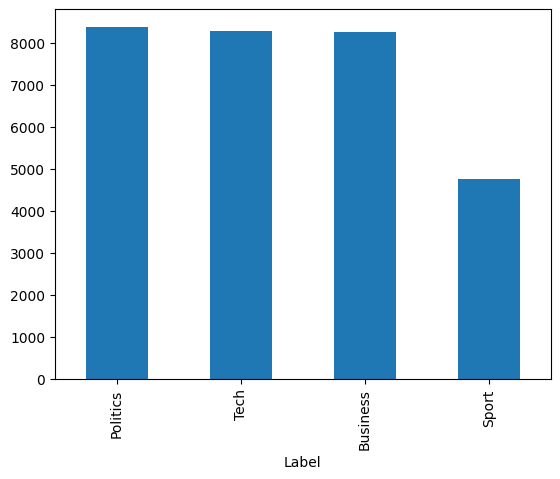

In [33]:
df['Label'].value_counts().plot.bar()


In [34]:
df.head()

,Header,Body,Label
0,Sam Bankman-Fried Faces 25 Years in Jail,"Sam Bankman-Fried, the former billionaire who ...",Business
1,Sam Bankman-Fried to be Sentenced for Defraudi...,Former crypto mogul Sam Bankman-Fried faces th...,Business
2,India’s Income Inequality Is Now Worse Than Un...,A new study from the World Inequality Lab find...,Business
3,Trump's Social Media Company Soars Nearly 50% ...,Shares of Donald Trump’s social media company ...,Business
4,How Is Trump's New Firm Worth Billions?,"On the cusp of a financial crisis, Donald Trum...",Business


In [35]:

'''
# if want create balance data

categories_to_reduce = ['Business', 'Tech', 'Politics']

# Separate the data
df_to_reduce = df[df['Label'].isin(categories_to_reduce)]
df_remain = df[~df['Label'].isin(categories_to_reduce)]

# Drop 30% of samples from specified categories
reduced_dfs = []
for category in categories_to_reduce:
    df_category = df_to_reduce[df_to_reduce['Label'] == category]
    reduced_count = int(len(df_category) * 0.7)  # Keeping 70% means dropping 30%
    df_reduced = df_category.sample(n=reduced_count)
    reduced_dfs.append(df_reduced)

# Concatenate the reduced datasets with the untouched dataset
df_final = pd.concat([pd.concat(reduced_dfs), df_remain])

# Shuffle the final DataFrame
df_final = df_final.sample(frac=1).reset_index(drop=True)
'''

"\n# if want create balance data\n\ncategories_to_reduce = ['Business', 'Tech', 'Politics']\n\n# Separate the data\ndf_to_reduce = df[df['Label'].isin(categories_to_reduce)]\ndf_remain = df[~df['Label'].isin(categories_to_reduce)]\n\n# Drop 30% of samples from specified categories\nreduced_dfs = []\nfor category in categories_to_reduce:\n    df_category = df_to_reduce[df_to_reduce['Label'] == category]\n    reduced_count = int(len(df_category) * 0.7)  # Keeping 70% means dropping 30%\n    df_reduced = df_category.sample(n=reduced_count)\n    reduced_dfs.append(df_reduced)\n\n# Concatenate the reduced datasets with the untouched dataset\ndf_final = pd.concat([pd.concat(reduced_dfs), df_remain])\n\n# Shuffle the final DataFrame\ndf_final = df_final.sample(frac=1).reset_index(drop=True)\n"

In [36]:
#df_final.head()

In [37]:
#df_final['Label'].value_counts().plot.bar()


# tokenize to select best model

In [ ]:
max_header = 0
j = 0
max_body = 0

for index , rows in df.iterrows() :
    max_header = max(len(df.iloc[index]['Header']), max_header)
    max_body = max(len(df.iloc[index]['Body']), max_body)

print(max_header)
print(max_body)

In [ ]:
max_header_length = 0
max_body_length = 0
max_header_index = None
max_body_index = None
count_more_10000 = 0

for index, row in df.iterrows():
    header_length = len(row['Header'])
    body_length = len(row['Body'])

    if header_length > max_header_length:
        max_header_length = header_length
        max_header_index = index

    if body_length > max_body_length:
        max_body_length = body_length
        max_body_index = index

    if max_body_length>10000 :
       count_more_10000+=1

print("Max Header Length:", max_header_length, "at index", max_header_index)
print("Max Body Length:", max_body_length, "at index", max_body_index)
print(count_more_10000)

In [ ]:
! pip install tensorflow transformers ;
from transformers import BertTokenizer


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
header_example = df.iloc[278]['Header']
body_example = df.iloc[278]['Body']

tokenizer(texts, padding=True, truncation=True, return_tensors='tf')
# Tokenize and calculate lengths
header_tokens = tokenizer.tokenize(header_example)
body_tokens = tokenizer.tokenize(body_example)

print(len(header_tokens))  #length of the header
print(len(body_tokens))  #length of the body

In [ ]:
from transformers import LongformerTokenizer, TFLongformerForSequenceClassification

tokenizer2 = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')
model = TFLongformerForSequenceClassification.from_pretrained('allenai/longformer-base-4096')

# Tokenize and calculate lengths
header_tokens2 = tokenizer2.tokenize(header_example)
body_tokens2 = tokenizer2.tokenize(body_example)

print(len(header_tokens2))  #length of the header
print(len(body_tokens2))  #length of the body

In [ ]:
!pip install transformers ;


In [ ]:
from transformers import BigBirdTokenizer, BigBirdForSequenceClassification

tokenizer3 = BigBirdTokenizer.from_pretrained("google/bigbird-roberta-base")

# Tokenize and calculate lengths
header_tokens3 = tokenizer3.tokenize(header_example)
body_tokens3 = tokenizer3.tokenize(body_example)

print(len(header_tokens3))  #length of the header
print(len(body_tokens3))  #length of the body

In [ ]:
from transformers import BigBirdTokenizer, TFBigBirdForSequenceClassification
import tensorflow as tf
import pandas as pd

df["text_to_classify"] = df['Header'] + " [SEP] " + df['Body']

tokenizer3 = BigBirdTokenizer.from_pretrained('google/bigbird-roberta-base')

# Initialize the model
model = TFBigBirdForSequenceClassification.from_pretrained('google/bigbird-roberta-base', num_labels=4)

example_texts = df["text_to_classify"].iloc[0]  # This should be adjusted to batch processing for real use

inputs = tokenizer3(example_texts, return_tensors="tf", max_length=4096, truncation=True, padding="max_length")

input_ids = inputs["input_ids"]
attention_mask = inputs["attention_mask"]

# Predict
outputs = model(input_ids, attention_mask=attention_mask)
logits = outputs.logits

# Softmax to convert logits to probabilities
predictions = tf.nn.softmax(logits, axis=-1)
print(predictions)

# roberta

In [15]:
!pip install transformers

In [16]:
import torch
import torch.nn as nn
import shutil
import sys
#Import these two transformer libraries
from transformers import BertForSequenceClassification, BertTokenizer, BertConfig
from transformers import RobertaForSequenceClassification, RobertaTokenizer, RobertaConfig
from sklearn.model_selection import train_test_split
import gc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support



In [17]:
torch.cuda.empty_cache()
gc.collect()

90

In [18]:
df_train, df_val = train_test_split(df_final, test_size=0.1, random_state=42, shuffle=True)

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2966 entries, 9074 to 23655
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Header  2966 non-null   object
 1   Body    2966 non-null   object
 2   Label   2966 non-null   object
dtypes: object(3)
memory usage: 92.7+ KB


In [20]:
# prepare train data
df_train['CONTEXT'] = df_train['Header'] + ". " + df_train['Body']
# one-hot-encoding
label_dummies = pd.get_dummies(df_train['Label'], prefix='Label').astype(int)
df_train = pd.concat([df_train, label_dummies], axis=1)
df_train.drop(['Header','Body','Label'], axis=1, inplace=True)
df_train.info()


# prepare validation data
df_val['CONTEXT'] = df_val['Header'] + ". " + df_val['Body']
label_dummies = pd.get_dummies(df_val['Label'], prefix='Label').astype(int)
df_val = pd.concat([df_val, label_dummies], axis=1)
df_val.drop(['Header','Body','Label'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2966 entries, 9074 to 23655
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CONTEXT         2966 non-null   object
 1   Label_Business  2966 non-null   int64 
 2   Label_Politics  2966 non-null   int64 
 3   Label_Sport     2966 non-null   int64 
 4   Label_Tech      2966 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 139.0+ KB


In [21]:
target_list = ['Label_Business' , 'Label_Politics' , 'Label_Sport' , 'Label_Tech']

In [22]:
# hyperparameters
MAX_LEN = 512
TRAIN_BATCH_SIZE = 32
VALID_BATCH_SIZE = 32
EPOCHS = 40
LEARNING_RATE = 0.001

In [23]:
from transformers import RobertaConfig, RobertaModel, RobertaTokenizer

In [24]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [25]:
class CustomDataset (torch.utils.data.Dataset):
    def __init__(self, df, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.df = df
        self.title = df['CONTEXT']
        self.targets =  self.df[target_list].values
        self.max_len = max_len
        #print(len(self.title))
        #print(len(self.targets))


    def __len__(self):
        return len(self.title)


    def __getitem__(self, index):
        try:
            #print(f"Accessing index: {index}")
            title = str(self.title[index])
            title = "".join(title.split())

            inputs = self.tokenizer.encode_plus(
            title,
            None,
            add_special_tokens= True,
            max_length= self.max_len,
            padding= "max_length",
            return_token_type_ids= True,
            truncation= True,
            return_attention_mask= True,
            return_tensors= 'pt'
            )

            return {
            'input_ids': inputs['input_ids'].flatten(),
            'attention_mask': inputs['attention_mask']. flatten(),
            'token_type_ids': inputs["token_type_ids"]. flatten(),
            'targets': torch.FloatTensor(self.targets[index])
            }

        except KeyError:
            print(f"KeyError accessing index: {index}")
            raise

In [26]:
# reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [27]:
df_train.head()

,CONTEXT,Label_Business,Label_Politics,Label_Sport,Label_Tech
0,Abortion Clinic Closures Double in Year After ...,0,1,0,0
1,Everything We Know So Far About the 2022 Winte...,0,0,1,0
2,This Magic Button Delivers Pizza to You and Th...,1,0,0,0
3,'At This Point Everybody Is Qualified.' Michel...,0,1,0,0
4,24 LinkedIn Do's and Don'ts Every Professional...,1,0,0,0


In [28]:
train_dataset = CustomDataset(df_train, tokenizer, MAX_LEN)
val_dataset = CustomDataset(df_val, tokenizer, MAX_LEN)

In [29]:
# determine data loader

train_data_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=TRAIN_BATCH_SIZE,
    shuffle=True,
    num_workers=0
)

val_data_loader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size= VALID_BATCH_SIZE,
    shuffle= True,
    num_workers=0
)

In [30]:
'''
for i, batch in enumerate(train_data_loader):
    if i > 1:  # Just to limit the number of prints
        break
'''

'\nfor i, batch in enumerate(train_data_loader):\n    if i > 1:  # Just to limit the number of prints\n        break\n'

In [31]:
# check type of devices
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [32]:
device

device(type='cuda')

In [33]:
# define checkpoint and use it after training

def load_ckp(checkpoint_fpath, model, optimizer):
    '''
    checkpoint_path: path to save checkpoint
    model: model that we want to load checkpoint parameters into
    optimizer: optimizer we defined in previous training
    '''
    # load check point
    checkpoint = torch.load(checkpoint_fpath)
    # initialize state_dict from checkpoint to model
    model.load_state_dict (checkpoint ['state_dict'])
    # initialize optimizer from checkpoint to optimizer
    optimizer.load_state_dict (checkpoint ['optimizer'])
    # initialize valid_loss_min from checkpoint to valid_loss_min
    valid_loss_min = checkpoint ['valid_loss_min']
    # return model, optimizer, epoch value, min validation loss
    return model, optimizer, checkpoint ['epoch'], valid_loss_min.item()


def save_ckp(state, is_best, checkpoint_path, best_model_path):
    '''
    state: checkpoint we want to save
    is_best: is this the best checkpoint; min validation loss
    checkpoint path: path to save checkpoint
    best_model_path: path to save best model
    '''
    f_path = checkpoint_path
    # save checkpoint data to the path given, checkpoint_path
    torch.save(state, f_path)
    # if it is a best model, min validation loss
    if is_best:
        best_fpath= best_model_path
        # copy that checkpoint file to best path given, best_model_path
        shutil.copyfile(f_path, best_fpath)

In [34]:
# train data

class BERTClass (torch.nn.Module):
    def __init__(self):
        super (BERTClass, self).__init__()
        self.bert_model = RobertaModel.from_pretrained('roberta-base', return_dict=True)

        # want to freeze the layer
        for param in self.bert_model.parameters():
            param.requires_grad = False

        self.dropout = torch.nn.Dropout(0.2)
        self.linear = torch.nn.Linear(768, 4)

    def forward(self, input_ids, attn_mask, token_type_ids):
        output = self.bert_model(
            input_ids,
            attention_mask=attn_mask,
            token_type_ids=token_type_ids
        )
        output_dropout = self.dropout(output.pooler_output)
        output = self.linear(output_dropout)
        return output

model = BERTClass()
model.to(device)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTClass(
  (bert_model): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerN

In [35]:
# loss function using BCEwithlogistsloss >> (cross entropy loss with sigmoid)
# optimizer using adam

def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

optimizer = torch.optim.Adam(params= model.parameters(), lr= LEARNING_RATE)


In [36]:
val_targets=[]
val_outputs=[]

train_losses = []
valid_losses = []
accuracies = []

In [37]:
# for first model ( FIRST )


def train_model(n_epochs, training_loader, validation_loader, model,
                optimizer, checkpoint_path, best_model_path):

    valid_loss_min = np.Inf

    for epoch in range(1, n_epochs+1):
        print(epoch)
        train_loss = 0
        valid_loss = 0

        model.train()
        print(f'###### #### Epoch {epoch}: Training Start ####')
        for batch_idx, data in enumerate(training_loader):
            #print(batch_idx)
            ids = data['input_ids'].to(device, dtype = torch.long)
            mask = data['attention_mask'].to(device, dtype = torch. long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)
            optimizer.zero_grad()
            loss = loss_fn(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1/(batch_idx + 1))*(loss.item()-train_loss))


        model.eval()
        print(f'############# Epoch (epoch): Validation Start')
        with torch.no_grad():
            for batch_idx, data in enumerate(validation_loader, 0):
                #print(batch_idx)
                ids = data['input_ids'].to(device, dtype=torch.long)
                mask = data['attention_mask'].to(device, dtype = torch.long)
                token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
                targets = data['targets'].to(device, dtype = torch.float)
                outputs = model(ids, mask, token_type_ids)
                loss= loss_fn(outputs, targets)
                valid_loss= valid_loss + ((1 / (batch_idx + 1)) * (loss.item() - valid_loss))
                val_targets.extend(targets.cpu().detach().numpy().tolist())
                val_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())


    checkpoint = {
        'epoch': epoch + 1,
        'valid_loss_min': valid_loss,
        'state_dict': model.state_dict(),
        'optimizer': optimizer.state_dict()
    }
    # save checkpoint
    save_ckp(checkpoint, True, checkpoint_path, best_model_path)

    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.4f} -> {:.4f}). Saving model.'.format(valid_loss_min, valid_loss))

        save_ckp(checkpoint, True, checkpoint_path, best_model_path)
        valid_loss_min = valid_loss
        print('*********** Epoch () Done #*#*\n'.format(epoch))

    return model


In [38]:
'''
def accuracy(outputs, targets):
    # Assuming outputs are logits, use softmax to get probabilities
    probs = torch.softmax(outputs, dim=1)
    # Get the predicted class
    predictions = torch.max(probs, 1)[1]
    # Compare with true labels to get the count of correct predictions
    correct_predictions = torch.eq(predictions, targets).sum().item()
    # Calculate accuracy
    accuracy = correct_predictions / targets.size(0)
    return accuracy

def train_model(n_epochs, training_loader, validation_loader, model, optimizer, checkpoint_path, best_model_path):
    valid_loss_min = np.Inf

    # Lists to store metrics for plotting
    train_losses, valid_losses = [], []
    train_accuracies, valid_accuracies = [], []

    for epoch in range(1, n_epochs + 1):
        train_loss, valid_loss = 0.0, 0.0
        train_accuracy, valid_accuracy = 0.0, 0.0

        # Training phase
        model.train()
        for data in training_loader:
            ids = data['input_ids'].to(device, dtype=torch.long)
            mask = data['attention_mask'].to(device, dtype=torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
            targets = data['targets'].to(device, dtype=torch.float)

            outputs = model(ids, mask, token_type_ids)
            loss = loss_fn(outputs, targets)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * ids.size(0)
            train_accuracy += accuracy(outputs, targets) * ids.size(0)

        # Validation phase
        model.eval()
        with torch.no_grad():
            for data in validation_loader:
                ids = data['input_ids'].to(device, dtype=torch.long)
                mask = data['attention_mask'].to(device, dtype=torch.long)
                token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
                targets = data['targets'].to(device, dtype=torch.float)

                outputs = model(ids, mask, token_type_ids)
                loss = loss_fn(outputs, targets)

                valid_loss += loss.item() * ids.size(0)
                valid_accuracy += accuracy(outputs, targets) * ids.size(0)

        # Calculate average loss and accuracy
        train_loss = train_loss / len(training_loader.dataset)
        valid_loss = valid_loss / len(validation_loader.dataset)
        train_accuracy = train_accuracy / len(training_loader.dataset)
        valid_accuracy = valid_accuracy / len(validation_loader.dataset)

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        train_accuracies.append(train_accuracy)
        valid_accuracies.append(valid_accuracy)

        print(f'Epoch {epoch}/{n_epochs}.. ')
        print(f'Train loss: {train_loss:.3f}.. '
              f'Validation Loss: {valid_loss:.3f}.. '
              f'Train Accuracy: {train_accuracy:.3f}.. '
              f'Validation Accuracy: {valid_accuracy:.3f}')

        # Implement checkpoint saving logic here based on validation loss

    # Plotting
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(valid_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(valid_accuracies, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return model
'''

"\ndef accuracy(outputs, targets):\n    # Assuming outputs are logits, use softmax to get probabilities\n    probs = torch.softmax(outputs, dim=1)\n    # Get the predicted class\n    predictions = torch.max(probs, 1)[1]\n    # Compare with true labels to get the count of correct predictions\n    correct_predictions = torch.eq(predictions, targets).sum().item()\n    # Calculate accuracy\n    accuracy = correct_predictions / targets.size(0)\n    return accuracy\n\ndef train_model(n_epochs, training_loader, validation_loader, model, optimizer, checkpoint_path, best_model_path):\n    valid_loss_min = np.Inf\n\n    # Lists to store metrics for plotting\n    train_losses, valid_losses = [], []\n    train_accuracies, valid_accuracies = [], []\n\n    for epoch in range(1, n_epochs + 1):\n        train_loss, valid_loss = 0.0, 0.0\n        train_accuracy, valid_accuracy = 0.0, 0.0\n\n        # Training phase\n        model.train()\n        for data in training_loader:\n            ids = data['in

In [39]:
ckpt_path = '/content/checkpoint.pth'
best_model_path = '/content/best_model.pth'

In [40]:
'''
torch.cuda.empty_cache()
gc.collect()
'''

'\ntorch.cuda.empty_cache()\ngc.collect()\n'

In [41]:
trained_model = train_model(EPOCHS, train_data_loader, val_data_loader, model, optimizer, ckpt_path, best_model_path)


1
###### #### Epoch 1: Training Start ####
############# Epoch (epoch): Validation Start


KeyboardInterrupt: 

In [ ]:
# for first model without plot ( FIRST )

'''
# This should actually be 2D if you have multiple samples
val_outputs = np.array(val_outputs)

# Apply softmax to convert logits to probabilities
val_probs = np.exp(val_outputs) / np.sum(np.exp(val_outputs), axis=1 , keepdims=True)

# Determine predictions: the index with the highest probability
val_preds = np.argmax(val_probs, axis=1)

# Example true labels
val_targets = np.array(val_targets)

if val_targets.ndim > 1 and val_targets.shape[1] > 1:
    val_true = np.argmax(val_targets, axis=1)
else:
    val_true = val_targets

# Calculate metrics
accuracy = accuracy_score(val_true, val_preds)
precision = precision_score(val_true, val_preds, average='macro')
recall = recall_score(val_true, val_preds, average='macro')
f1 = f1_score(val_true, val_preds, average='macro')


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
'''

In [ ]:
'''
val_probs = torch.sigmoid(torch.tensor(val_outputs)).numpy()

# Apply threshold to convert probabilities to binary predictions
threshold = 0.5
val_preds = (val_probs > threshold).astype(int)

# True labels
val_true = np.array(val_targets)

# Calculate Accuracy
accuracy = accuracy_score(val_true, val_preds)

# Calculate Precision, Recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(val_true, val_preds, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
'''

In [ ]:
val_targets[0]

In [ ]:
val_outputs[0]

In [ ]:
val_probs[0]

In [ ]:
val_preds[0]

# DIBERTA

In [17]:
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
from transformers import TextClassificationPipeline

import tensorflow as tf
import pandas as pd
import json
import gc

from sklearn.model_selection import train_test_split

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopw = stopwords.words('english')

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot

from tqdm import tqdm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
df.shape

(29664, 3)

In [19]:
df.head()

,Header,Body,Label
0,Sam Bankman-Fried Faces 25 Years in Jail,"Sam Bankman-Fried, the former billionaire who ...",Business
1,Sam Bankman-Fried to be Sentenced for Defraudi...,Former crypto mogul Sam Bankman-Fried faces th...,Business
2,India’s Income Inequality Is Now Worse Than Un...,A new study from the World Inequality Lab find...,Business
3,Trump's Social Media Company Soars Nearly 50% ...,Shares of Donald Trump’s social media company ...,Business
4,How Is Trump's New Firm Worth Billions?,"On the cusp of a financial crisis, Donald Trum...",Business


In [38]:
df_DI = df.copy()

In [39]:
df_DI['TEXT'] = df_DI['Header'] + ". " + df_DI['Body']

df_DI['count'] = df_DI['TEXT'].apply(lambda x: len(x.split()))

df_DI.head()

,Header,Body,Label,TEXT,count
0,Sam Bankman-Fried Faces 25 Years in Jail,"Sam Bankman-Fried, the former billionaire who ...",Business,Sam Bankman-Fried Faces 25 Years in Jail. Sam ...,1449
1,Sam Bankman-Fried to be Sentenced for Defraudi...,Former crypto mogul Sam Bankman-Fried faces th...,Business,Sam Bankman-Fried to be Sentenced for Defraudi...,570
2,India’s Income Inequality Is Now Worse Than Un...,A new study from the World Inequality Lab find...,Business,India’s Income Inequality Is Now Worse Than Un...,746
3,Trump's Social Media Company Soars Nearly 50% ...,Shares of Donald Trump’s social media company ...,Business,Trump's Social Media Company Soars Nearly 50% ...,692
4,How Is Trump's New Firm Worth Billions?,"On the cusp of a financial crisis, Donald Trum...",Business,How Is Trump's New Firm Worth Billions?. On th...,842


In [41]:
df_DI.drop(['Header', 'Body'], axis=1, inplace=True)

In [42]:
df_DI.head()

,Label,TEXT,count
0,Business,Sam Bankman-Fried Faces 25 Years in Jail. Sam ...,1449
1,Business,Sam Bankman-Fried to be Sentenced for Defraudi...,570
2,Business,India’s Income Inequality Is Now Worse Than Un...,746
3,Business,Trump's Social Media Company Soars Nearly 50% ...,692
4,Business,How Is Trump's New Firm Worth Billions?. On th...,842


<Figure size 800x800 with 0 Axes>

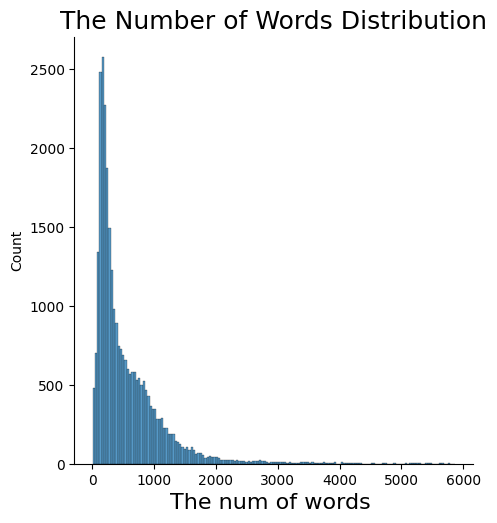

In [48]:
plt.figure(figsize= (8, 8))
sns.displot(df_DI['count'])

#plt.xlim(0, 1000)
plt.xlabel('The num of words ', fontsize = 16)
plt.title("The Number of Words Distribution", fontsize = 18)
plt.show()

In [56]:
category_count = df_DI['Label'].value_counts()

categories = category_count.index

<ipython-input-61-ca34da6073bb>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




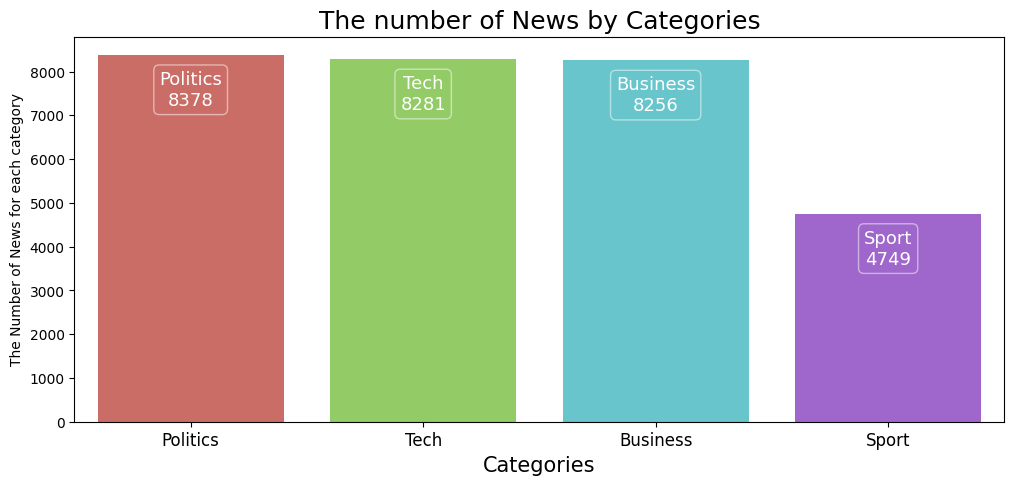

In [61]:
fig = plt.figure(figsize= (12, 5))
ax = fig.add_subplot(111)
palette = sns.color_palette('hls', len(category_count))  # Change the palette for different color schemes


sns.barplot(x = df_DI['Label'].value_counts().index, y = df_DI['Label'].value_counts(), palette=palette)

for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 13, color = 'white' , ha = 'center', va = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )

plt.xlabel('Categories', size = 15)

plt.ylabel('The Number of News for each category', size= 10)

plt.xticks(size = 12)

plt.title("The number of News by Categories" , size = 18)

plt.show()

In [69]:
df_DI['Encoded_label_cat'] = df_DI['Label'].astype('category').cat.codes
df_DI.head(1)


,Label,TEXT,count,Encoded_label_cat
0,Business,Sam Bankman-Fried Faces 25 Years in Jail. Sam ...,1449,0


In [70]:
data_texts = df_DI['TEXT'].to_list()

data_labels = df_DI['Encoded_label_cat'].to_list()

In [71]:
train_texts, val_texts, train_labels, val_labels = train_test_split(data_texts, data_labels, test_size = 0.2, random_state = 0 )


train_texts, test_texts, train_labels, test_labels = train_test_split(train_texts, train_labels, test_size = 0.05, random_state = 0 )

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

train_encodings = tokenizer(train_texts, truncation = True, padding = True  )

val_encodings = tokenizer(val_texts, truncation = True, padding = True )